<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/Exercises%20Carbon_footprint%20Data%20Camp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# Install
install.packages("openintro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘airports’, ‘cherryblossom’, ‘usdata’




In [ ]:
# Load
library(devtools)
library(dplyr)
library(ggplot2)
library(openintro)
library(broom)

Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: airports

Loading required package: cherryblossom

Loading required package: usdata



# Import dataset Food Consumption & Carbon Footprint

Import Food Consumption & Carbon Footprint from datacamp:

https://assets.datacamp.com/production/repositories/5758/datasets/db0baead85e109313372094f52254abaae4ea57f/food_consumption.rds
https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018


In [ ]:
# Saved locally 
food_consumption = readRDS("/content/food_consumption.rds")

# Print head and feature value types
head(food_consumption)
str(food_consumption)

country,food_category,consumption,co2_emission
<chr>,<fct>,<dbl>,<dbl>
Argentina,pork,10.51,37.20
Argentina,poultry,38.66,41.53
Argentina,beef,55.48,1712.00
Argentina,lamb_goat,1.56,54.63
Argentina,fish,4.36,6.96
Argentina,eggs,11.39,10.46


spec_tbl_df [1,430 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country      : chr [1:1430] "Argentina" "Argentina" "Argentina" "Argentina" ...
 $ food_category: Factor w/ 11 levels "beef","eggs",..: 7 8 1 4 3 2 5 11 9 10 ...
 $ consumption  : num [1:1430] 10.51 38.66 55.48 1.56 4.36 ...
 $ co2_emission : num [1:1430] 37.2 41.53 1712 54.63 6.96 ...


# Quintiles of Co2 emissions

In [ ]:
# Calculate the deciles of co2_emission
quantile(food_consumption$co2_emission, probs = seq(0, 1, 0.1))

0%      10%      20%      30%      40%      50%      60%      70% 
   0.000    0.668    3.540    7.040   11.026   16.530   25.590   44.271 
     80%      90%     100% 
  99.978  203.629 1712.000

# Histogram for every food category in terms of co2 emissions

Each count observation represent a country.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



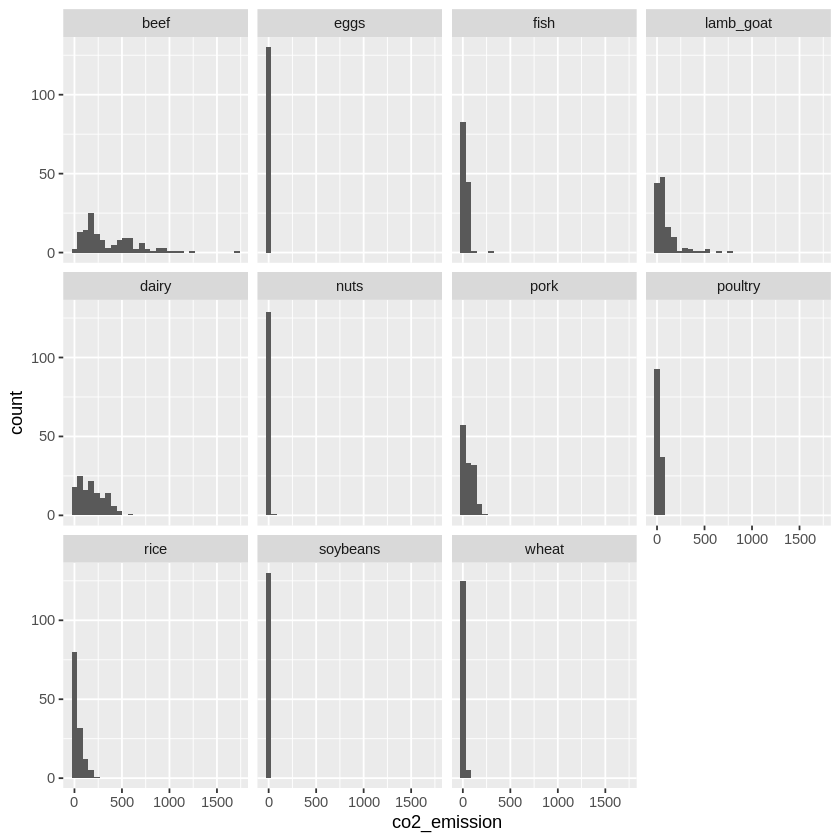

In [ ]:
# Create subgraphs for each food_category: histogram of co2_emission
ggplot(food_consumption, aes(co2_emission)) +
  # Create a histogram
  geom_histogram() +
  # Create a separate sub-graph for each food_category
  facet_wrap(~ food_category)

# Center measures and spread.

In [ ]:
# First I group by  food category and summarize by mean, median, var, sd
food_cat <- food_consumption %>%
  group_by(food_category) %>%
  summarize(mean_cons= mean(consumption), median_cons= median(consumption), sd_cons= sd(consumption),
  mean_co2 = mean(co2_emission), sd_co2 = sd(co2_emission))

food_cat

,food_category,mean_cons,median_cons,sd_cons,mean_co2,sd_co2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,beef,12.1233846,8.285,9.654140,374.1020000,297.9067105
2,eggs,8.1637692,8.420,5.032582,7.4996154,4.6229665
3,fish,17.2870769,13.950,19.013508,27.6016923,30.3584807
4,lamb_goat,2.6001538,1.325,3.665252,91.0567692,128.3569958
5,dairy,125.7746923,110.975,93.327721,179.1538462,132.9356686
6,nuts,4.1372308,3.495,3.372817,7.3230000,5.9698955
7,pork,16.1236923,10.355,15.717646,57.0700769,55.6323965
8,poultry,21.2192308,19.855,14.571980,22.7935385,15.6533320
9,rice,29.3751538,11.875,37.324471,37.5916154,47.7637545


Beef has the biggest amount of variation in its CO emissions, while eggs, nuts, and soybeans have relatively small amounts of variation. Even tough it would be preferably to analyze each food category individually in different scales.

Beef consumptions differs in large amount between countries and it's heavy in terms of Co2 emissions.

# 10 countries with highest Co2 emission because of food consumption

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country <- food_consumption %>%
  group_by(country) %>%
  summarize(total_emission = sum(co2_emission))

# Sort by total emission and display head 10.
emissions_by_country <- emissions_by_country[order(-emissions_by_country$total_emission),]

head(emissions_by_country,10)

country,total_emission
<chr>,<dbl>
Argentina,2172.40
Australia,1938.66
Albania,1777.85
New Zealand,1750.95
Iceland,1731.36
USA,1718.86
Uruguay,1634.91
Brazil,1616.73
Luxembourg,1598.41


# Which countries are beyond 1.5 IQR? (Outlier)

In [ ]:
# Compute the first and third quantiles and IQR of total_emission
q1 <- quantile(emissions_by_country$total_emission, 0.25)
q3 <- quantile(emissions_by_country$total_emission, 0.75)
iqr <- q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower <- q1 - 1.5 * iqr
upper <- q3 + 1.5 * iqr

# Filter emissions_by_country to find outliers
emissions_by_country %>%
  filter(total_emission < lower | total_emission > upper)

country,total_emission
<chr>,<dbl>
Argentina,2172.4


In terms of 1.5 IQR. Argentina is the only contry in the dataset to be considered outlier.

# How many categories each country has above 10kg per person per year?

In [ ]:
# Count the deals for each product
countcat_more_10 = food_consumption %>%
  filter(consumption>30) %>%
  count(country)

head(countcat_more_10)

country,n
<chr>,<int>
Albania,2
Algeria,2
Angola,1
Argentina,4
Armenia,2
Australia,4


For example Argentina has 4 categories above 30kg per year per person of a total of 11. The intensive consumption of some particular animal food categories makes this country to have the highest co2 emission of all.
